In [ ]:
!pip install -q kaggle

In [ ]:
rm -rf /root/.kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bryancimo/sdss-galaxy-classification-dr18

Dataset URL: https://www.kaggle.com/datasets/bryancimo/sdss-galaxy-classification-dr18
License(s): CC0-1.0
 27% 5.00M/18.4M [00:00<00:00, 21.3MB/s]
100% 18.4M/18.4M [00:00<00:00, 63.1MB/s]


In [ ]:
!unzip /content/sdss-galaxy-classification-dr18.zip

Archive:  /content/sdss-galaxy-classification-dr18.zip
replace sdss_100k_galaxy_form_burst.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install --upgrade numpy

IMPORTING THE LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE



READ THE DATASET

In [ ]:
df=pd.read_csv('/content/sdss_100k_galaxy_form_burst.csv',header=1)

In [ ]:
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021


HANDING MISSING VALUES

In [ ]:
df.shape

(100000, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [ ]:
df.isnull().sum()

objid           0
specobjid       0
ra              0
dec             0
u               0
g               0
r               0
i               0
z               0
modelFlux_u     0
modelFlux_g     0
modelFlux_r     0
modelFlux_i     0
modelFlux_z     0
petroRad_u      0
petroRad_g      0
petroRad_i      0
petroRad_r      0
petroRad_z      0
petroFlux_u     0
petroFlux_g     0
petroFlux_i     0
petroFlux_r     0
petroFlux_z     0
petroR50_u      0
petroR50_g      0
petroR50_i      0
petroR50_r      0
petroR50_z      0
psfMag_u        0
psfMag_r        0
psfMag_g        0
psfMag_i        0
psfMag_z        0
expAB_u         0
expAB_g         0
expAB_r         0
expAB_i         0
expAB_z         0
class           0
subclass        0
redshift        0
redshift_err    0
dtype: int64

CHANHING THE DATATYPE OF SUBCLASS FROM OBJECT TO INT

In [ ]:
df['subclass'].replace(['STARFORMING','STARBURST'],[0,1],inplace=True)
df['class'].replace(['GALAXY'],[0],inplace=True)

In [ ]:
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,0,0,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,0,0,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,0,0,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,0,0,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,0,0,0.136658,0.000021


In [ ]:
df.shape

(100000, 43)

DESCRIPTIVE STATISTICAL

In [ ]:
df.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000
mean,1.237659e+18,2.303595e+18,180.577802,23.472475,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,...,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.0,0.250070,0.116753,0.000179
std,6.103756e+12,2.531359e+18,75.751994,21.140744,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,...,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.0,0.433055,0.100169,0.052189
min,1.237646e+18,2.994897e+17,0.008745,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.0,0.000000,-0.000833,0.000002
25%,1.237655e+18,8.130687e+17,138.741880,3.120118,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,...,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.0,0.000000,0.055836,0.000008
50%,1.237659e+18,1.457564e+18,181.492972,20.913596,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,...,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.0,0.000000,0.085850,0.000011
75%,1.237663e+18,2.367902e+18,223.851863,42.259965,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,...,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,0.0,1.000000,0.135148,0.000015
max,1.237681e+18,1.412691e+19,359.997922,68.695258,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,...,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,0.0,1.000000,0.572899,16.503710


UNIVARIATE ANALYSIS

In [ ]:
sub = df["subclass"].value_counts()
sub

subclass
0    74993
1    25007
Name: count, dtype: int64

array([<Axes: ylabel='count'>], dtype=object)

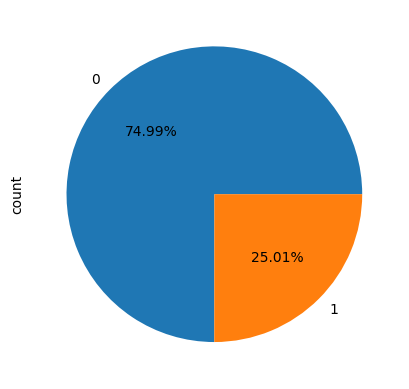

In [ ]:
sub.plot(kind="pie",subplots=True,autopct="%1.2f%%")

HANDLING THE OUTLIERS

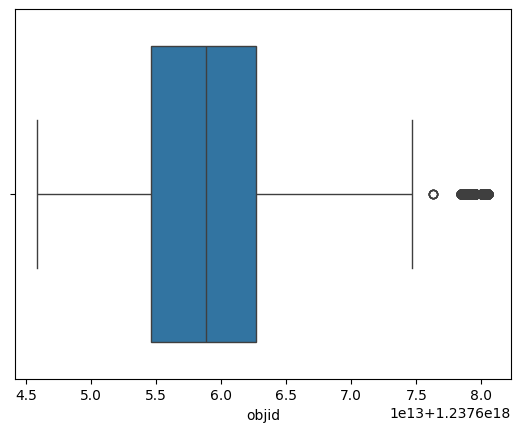

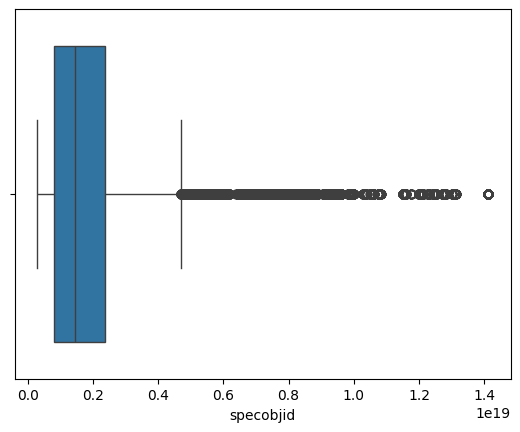

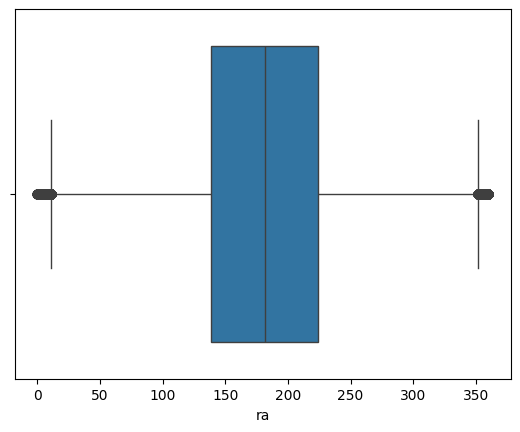

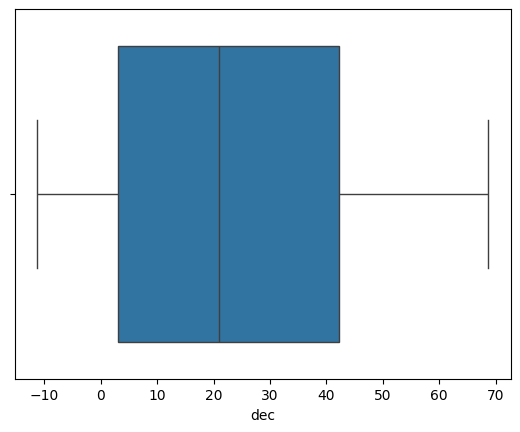

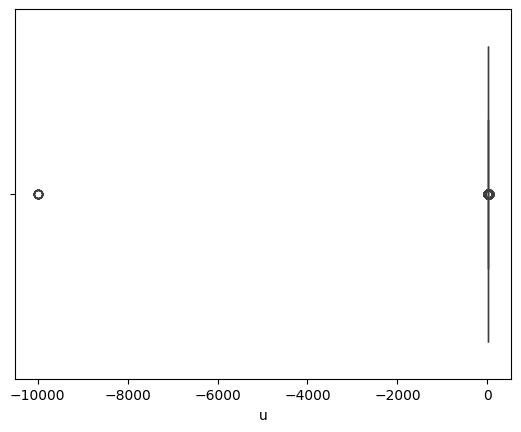

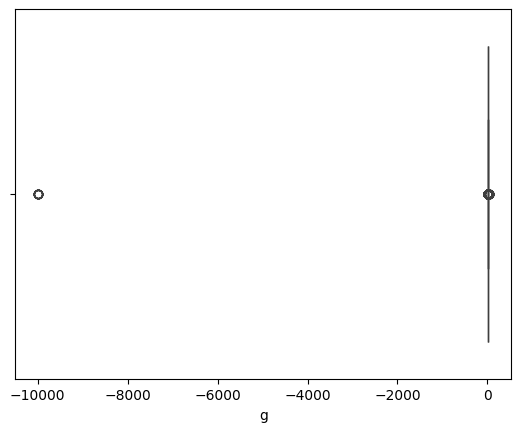

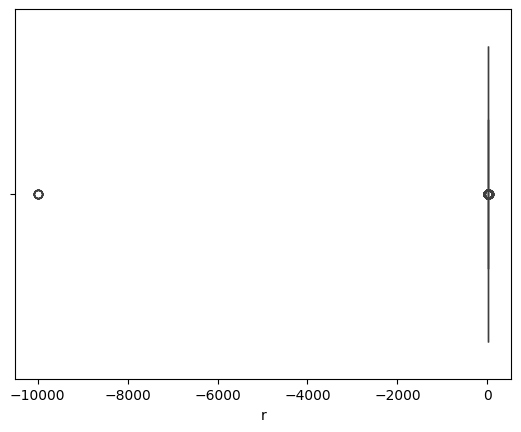

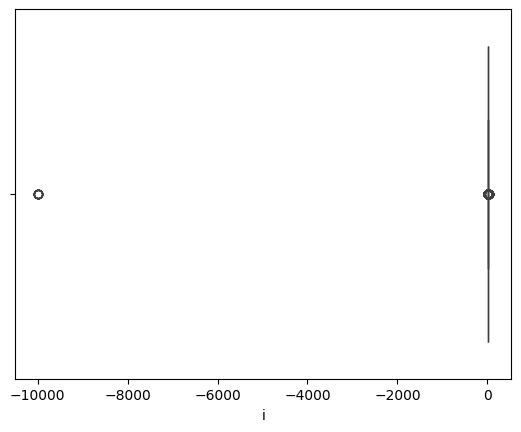

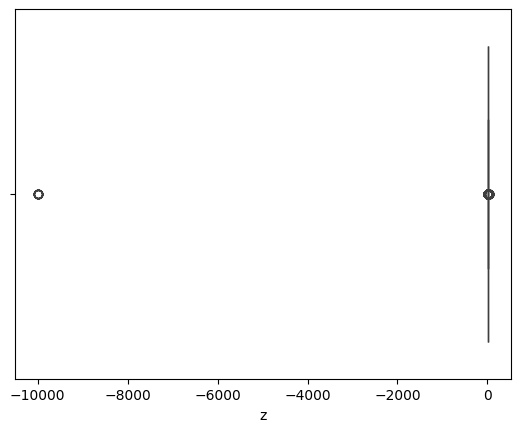

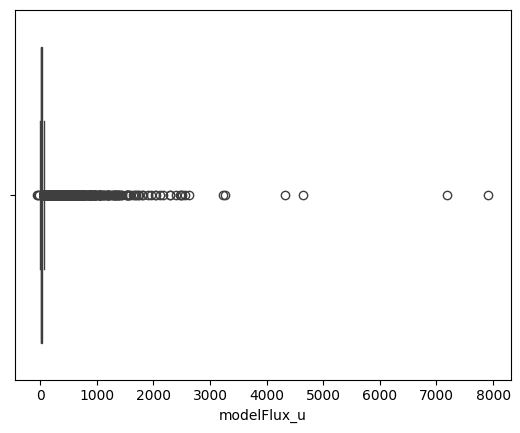

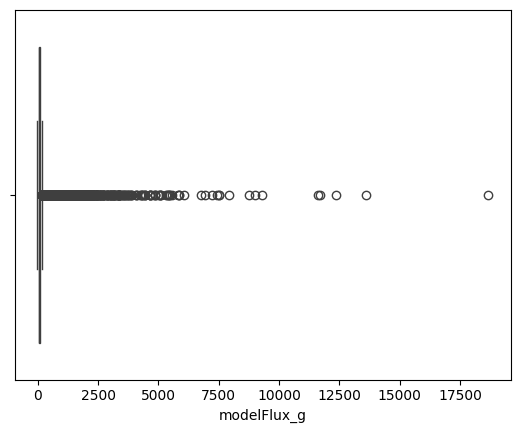

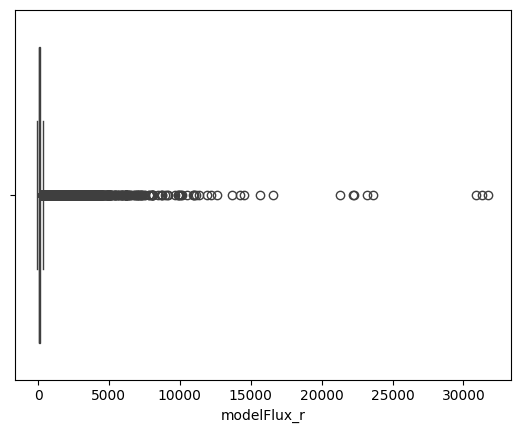

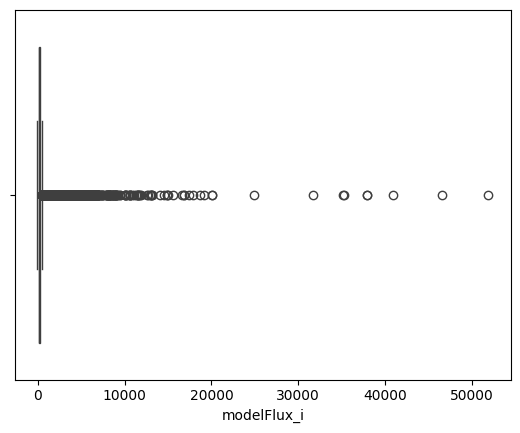

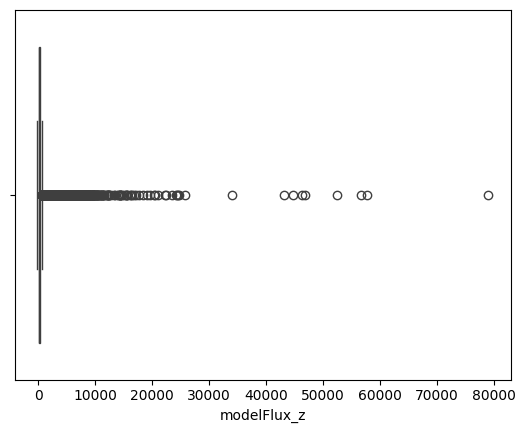

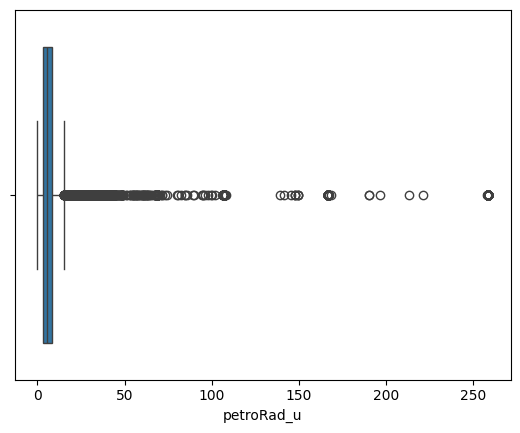

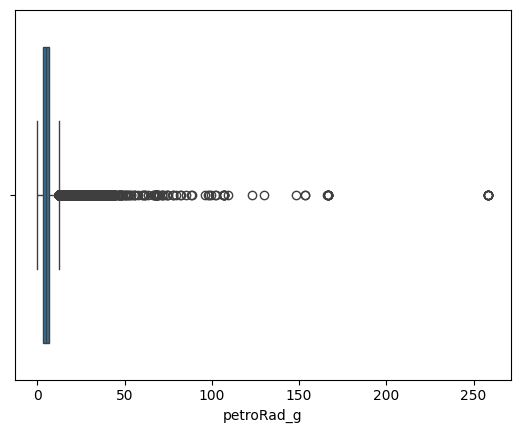

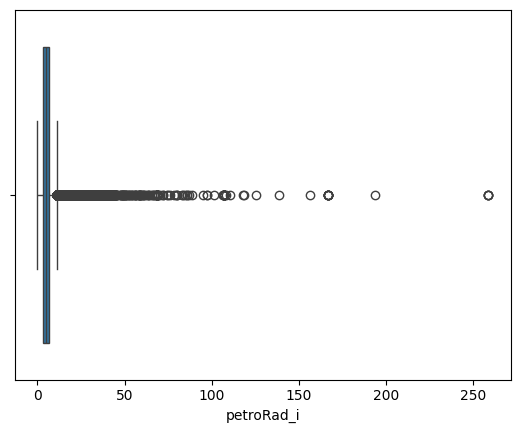

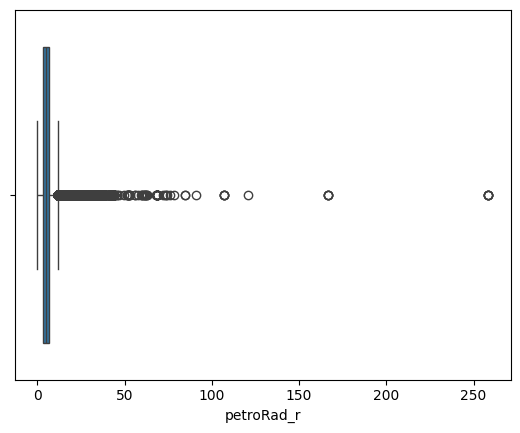

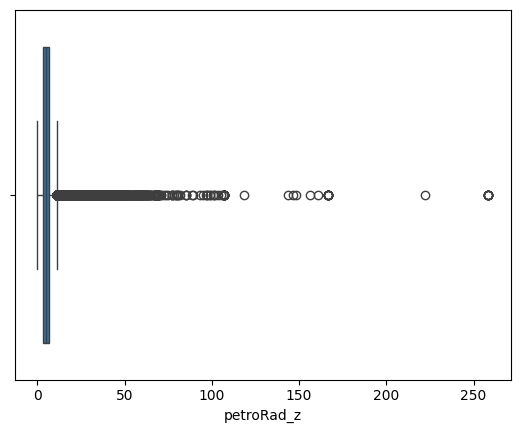

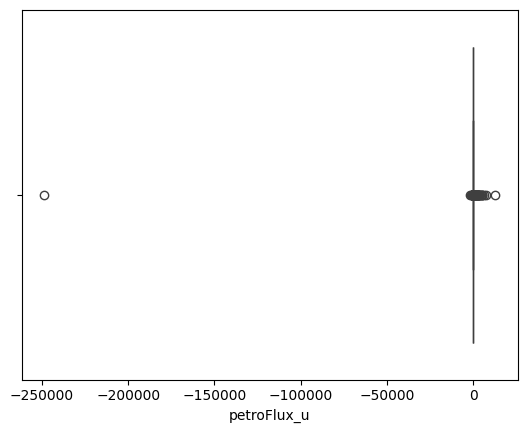

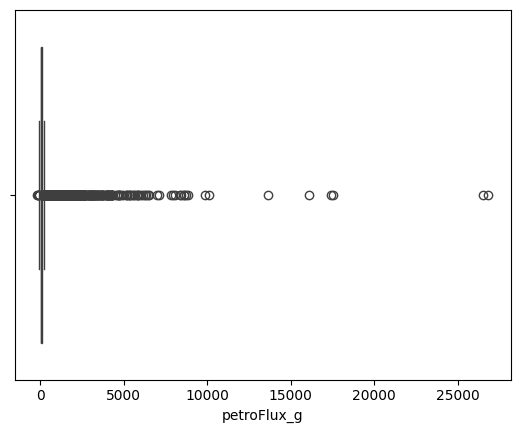

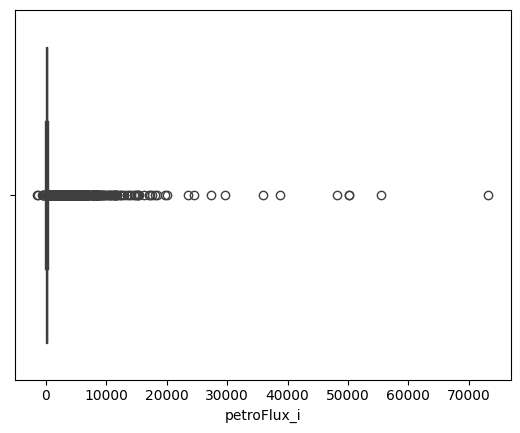

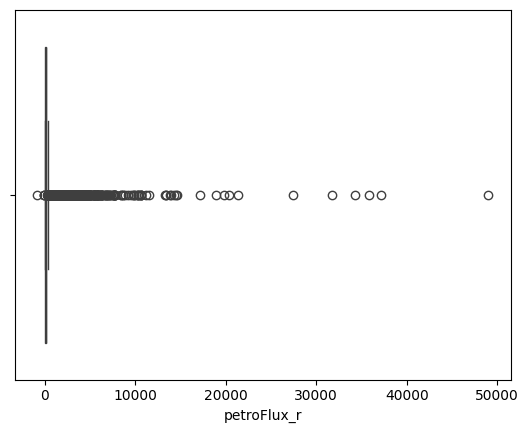

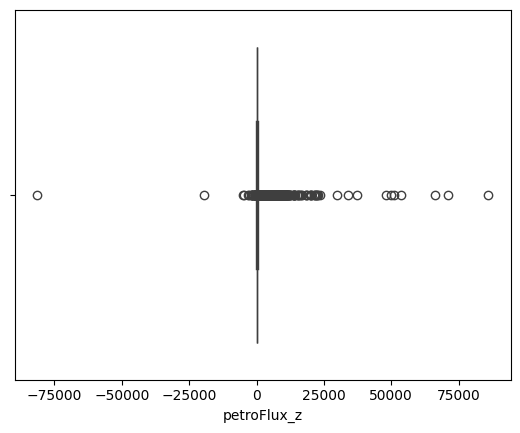

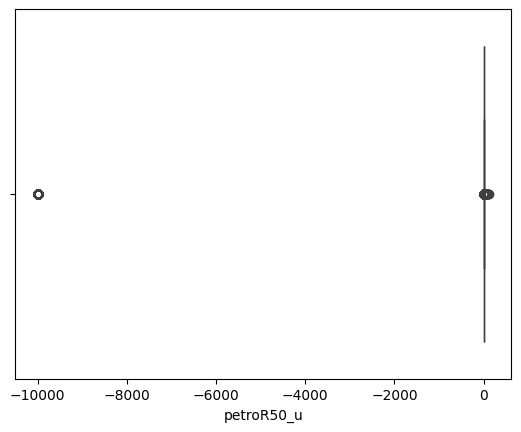

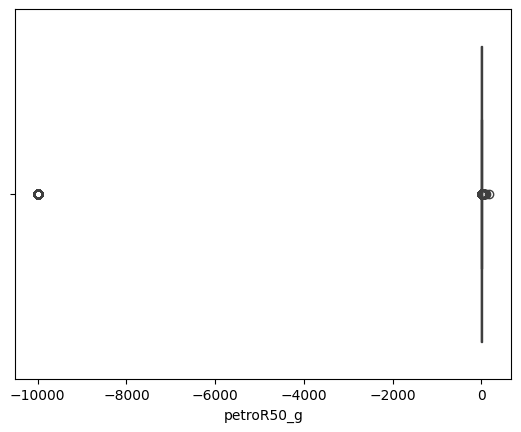

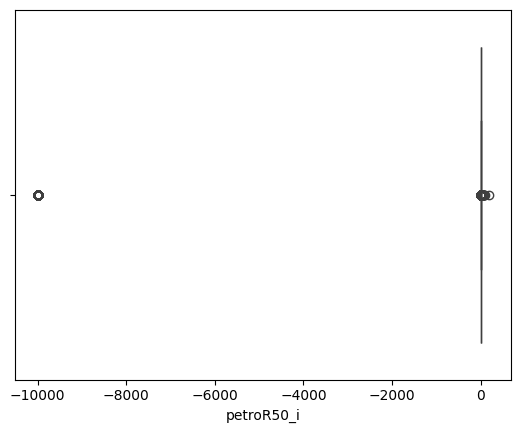

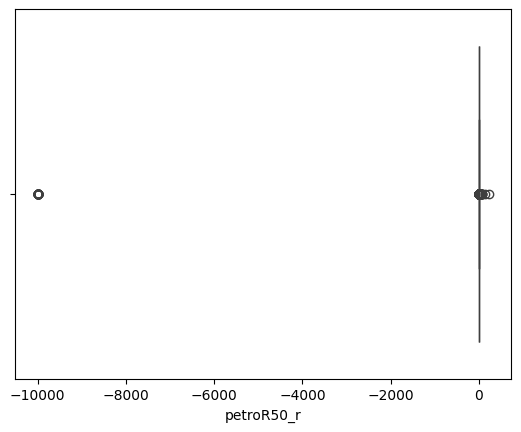

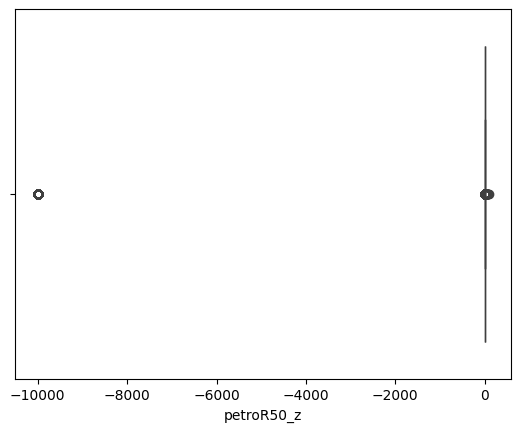

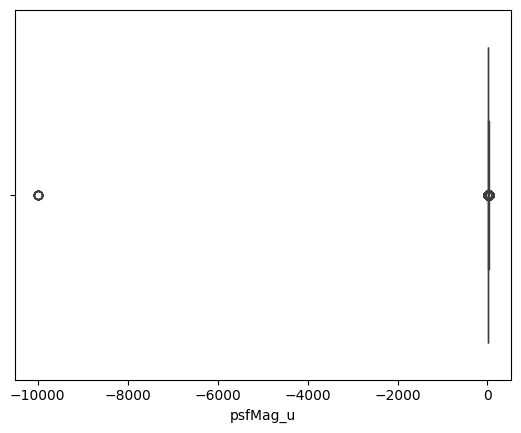

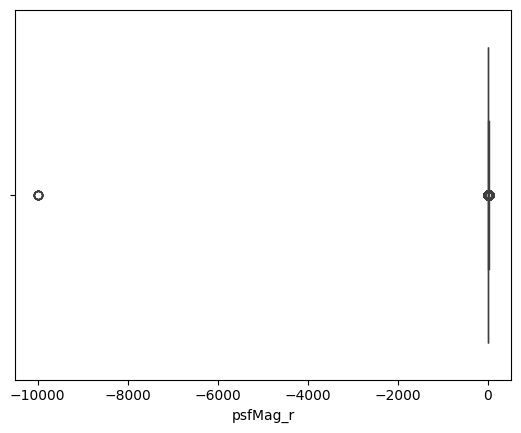

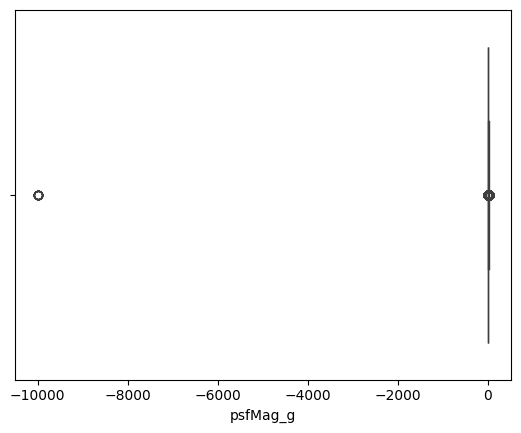

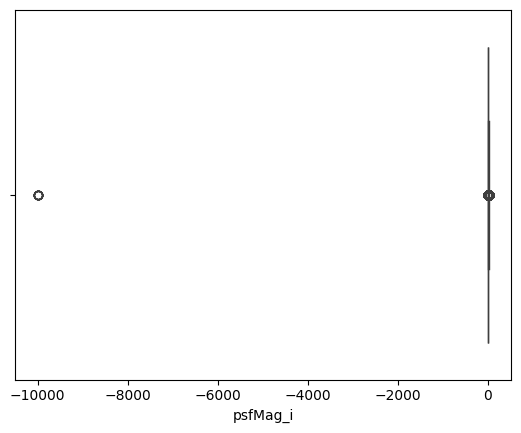

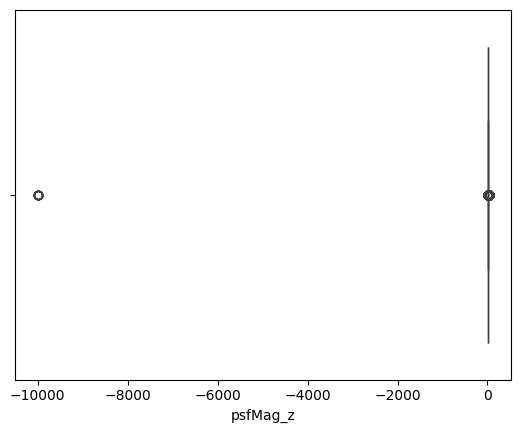

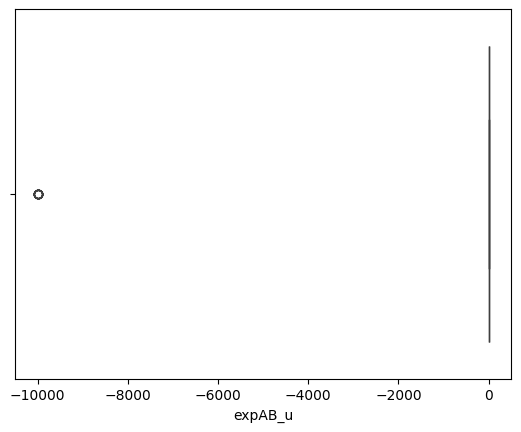

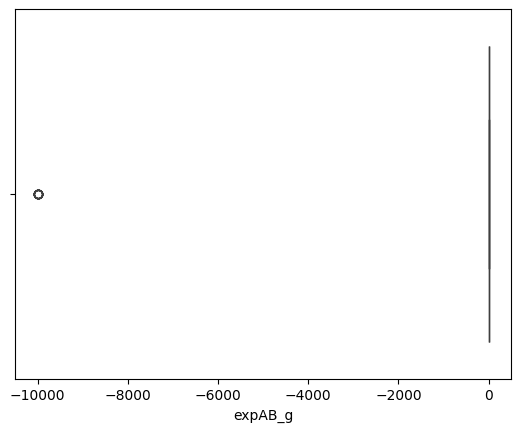

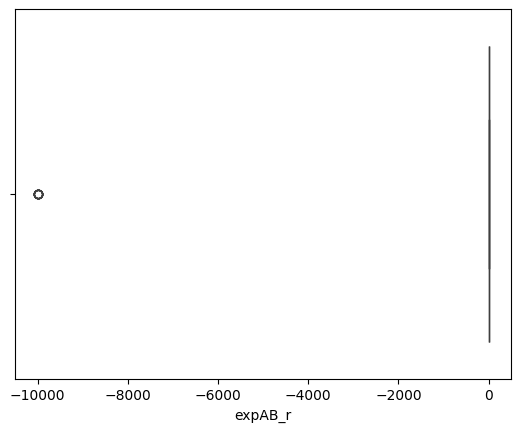

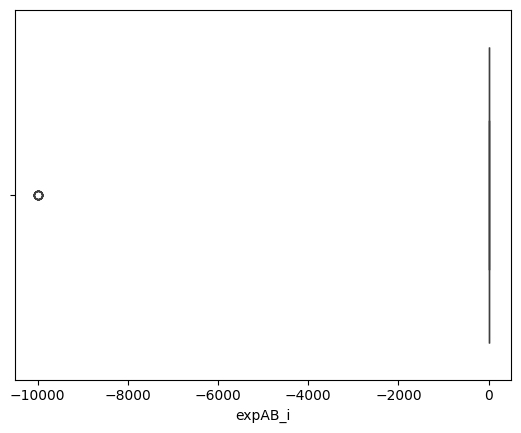

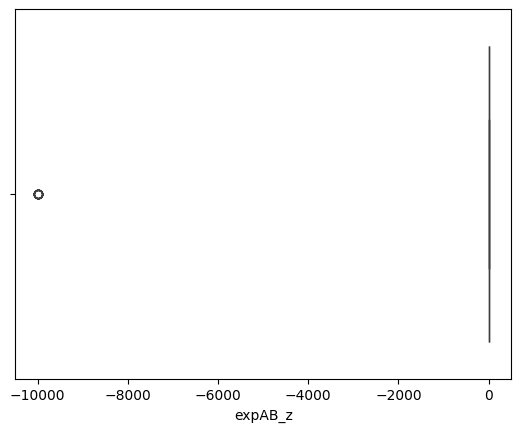

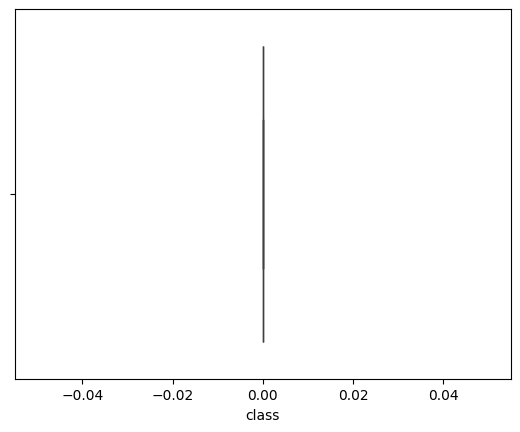

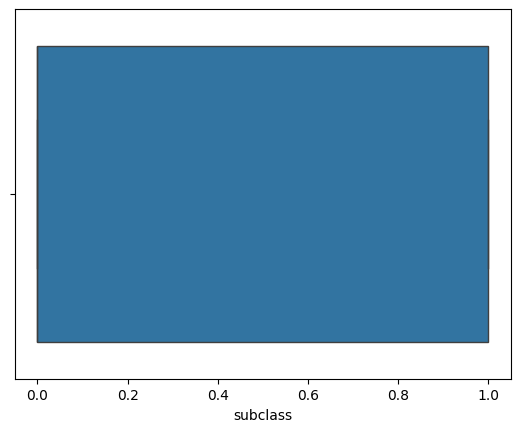

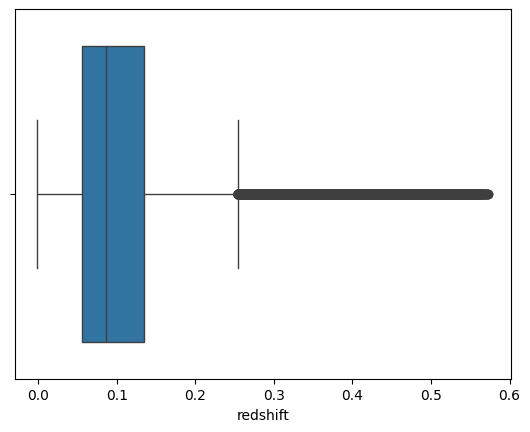

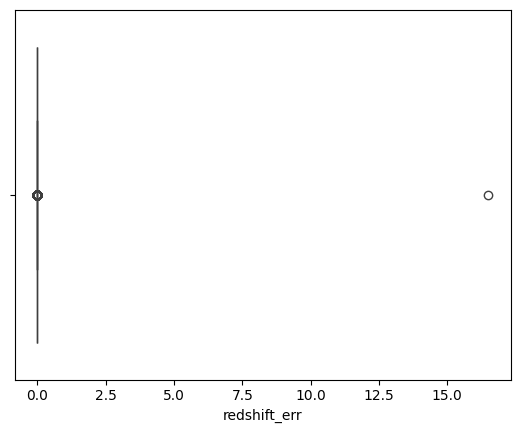

In [ ]:
def func(col):
  sns.boxplot(x=col,data=df)
  plt.show()
for i in df.columns:
  func(i)

In [ ]:
# Iterate over each column
for column in df.columns:
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate quantiles
        quant = df[column].quantile(q=[0.75, 0.25])
        Q3 = quant.loc[0.75]
        Q1 = quant.loc[0.25]

        # Calculate IQR
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with values within the bounds
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

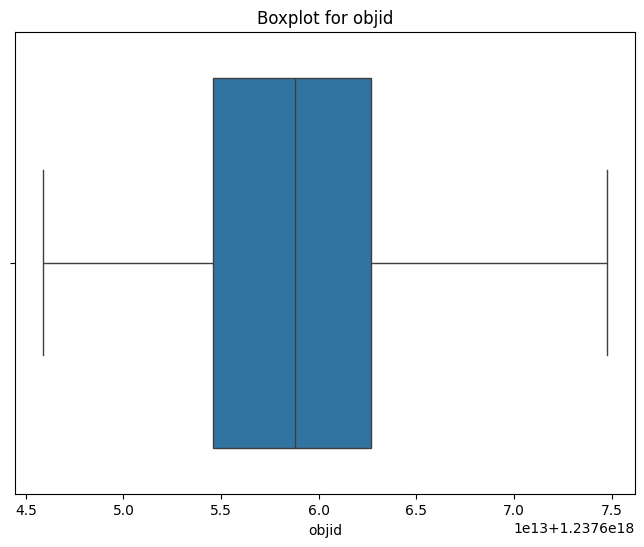

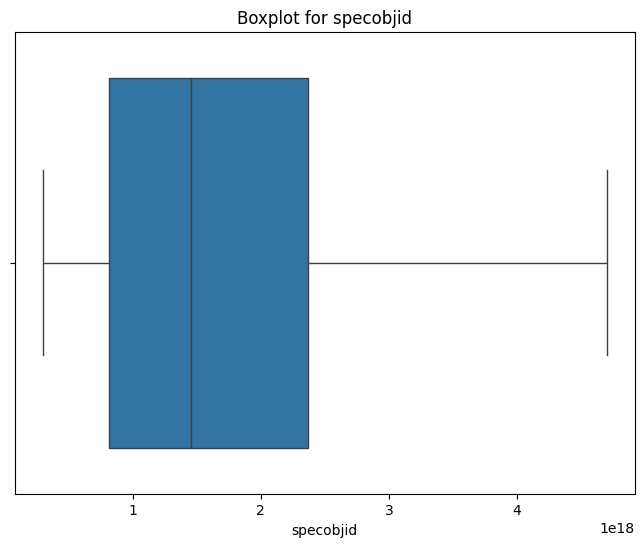

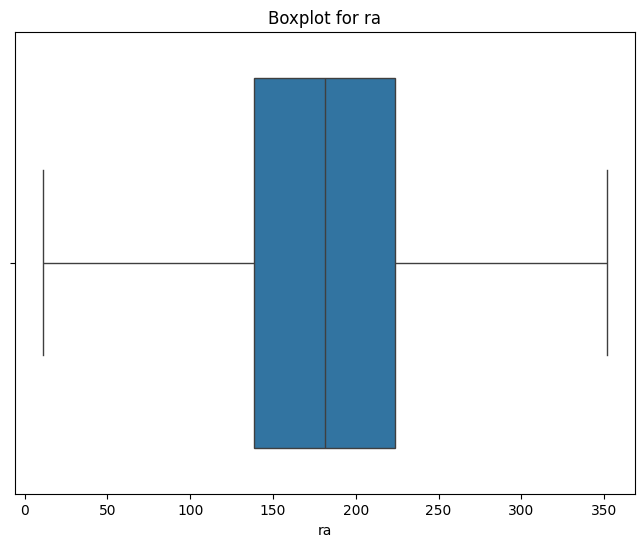

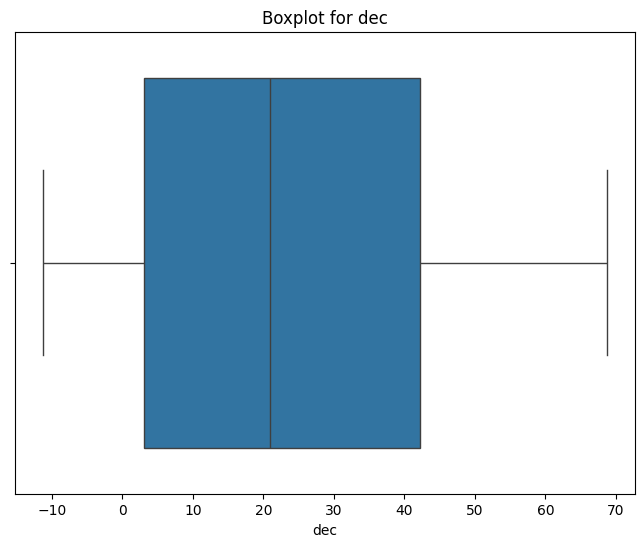

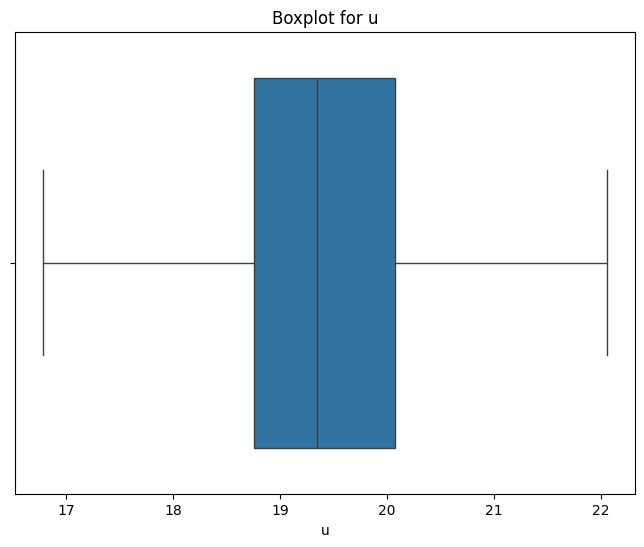

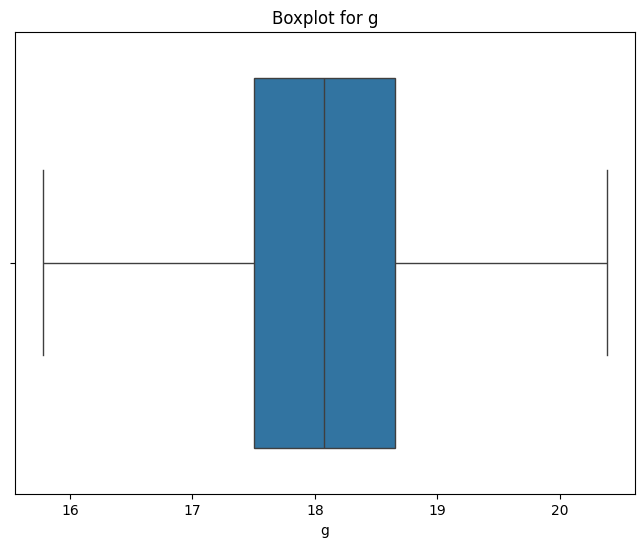

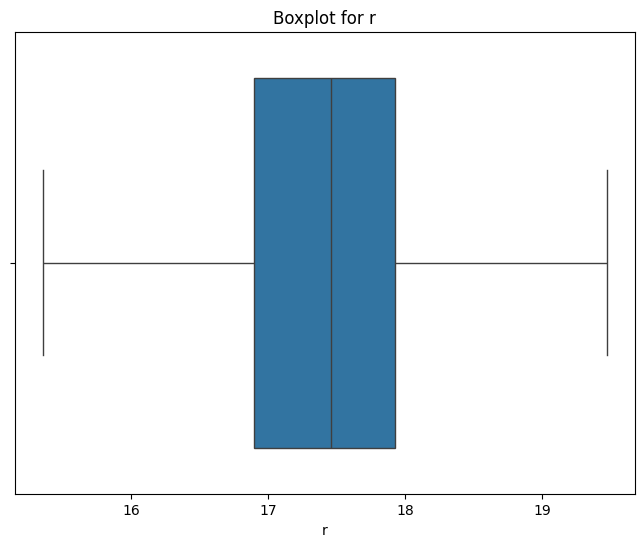

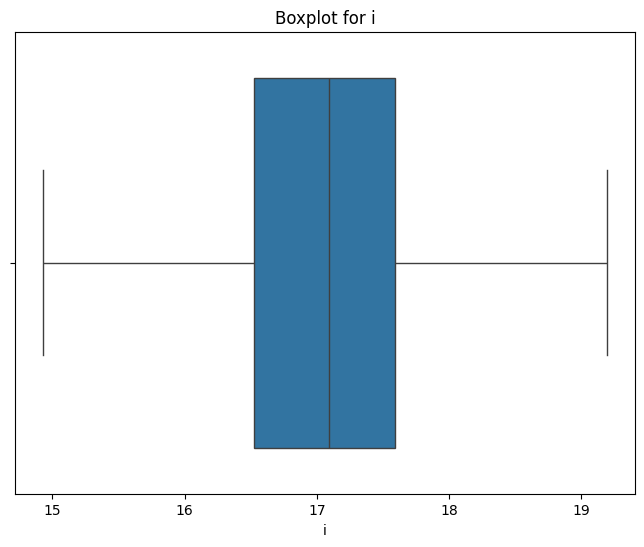

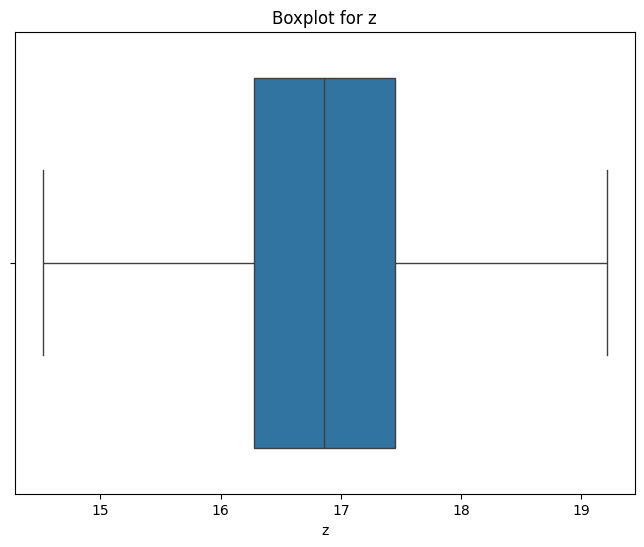

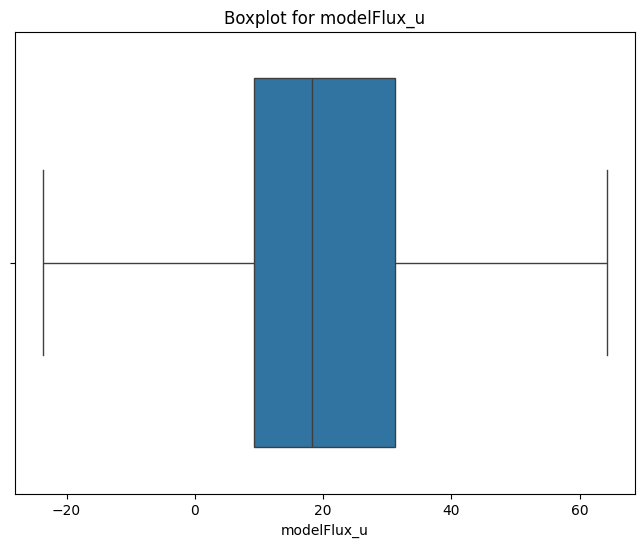

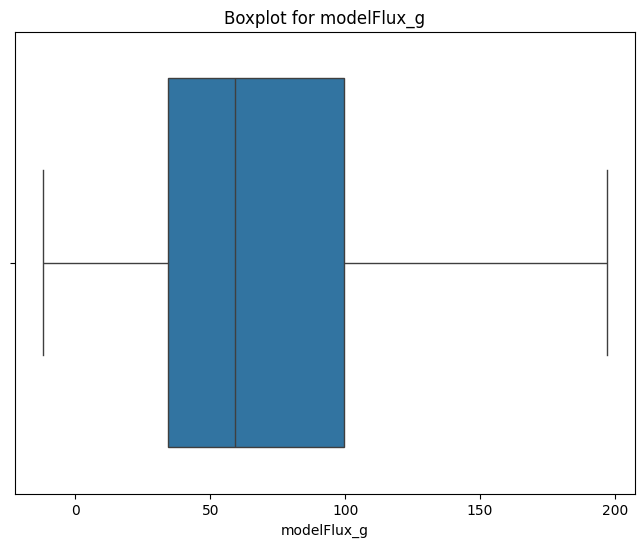

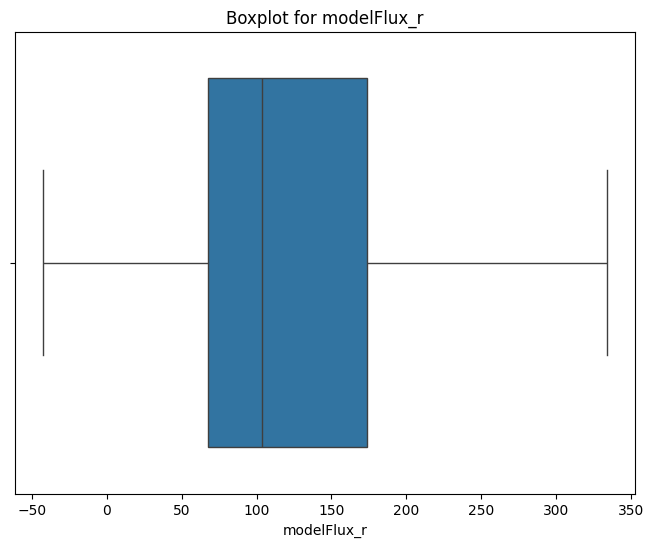

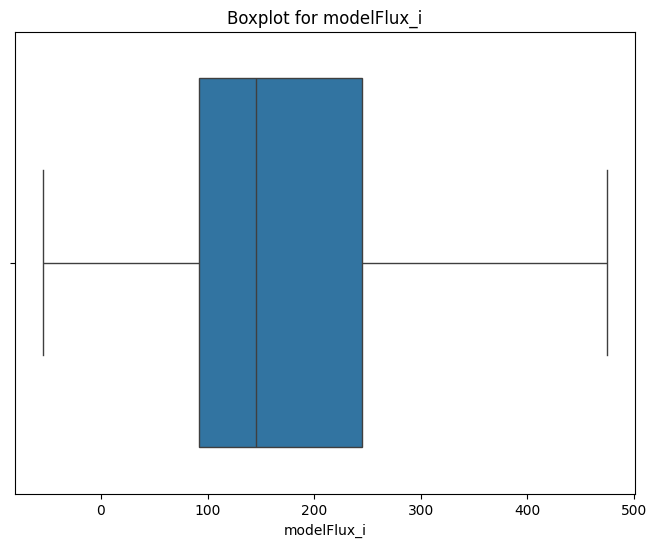

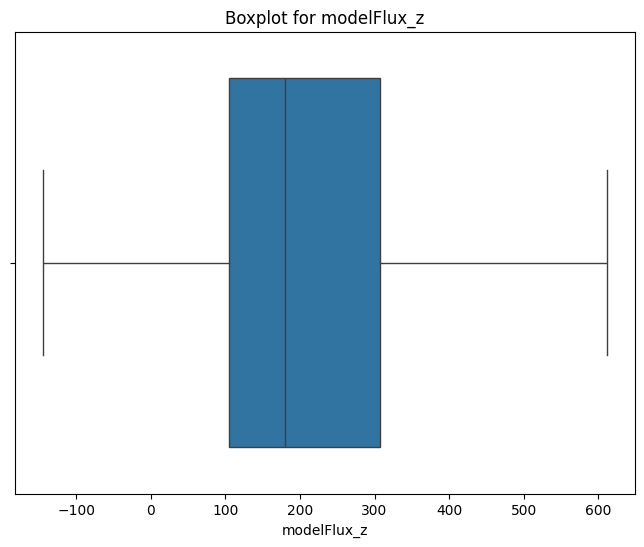

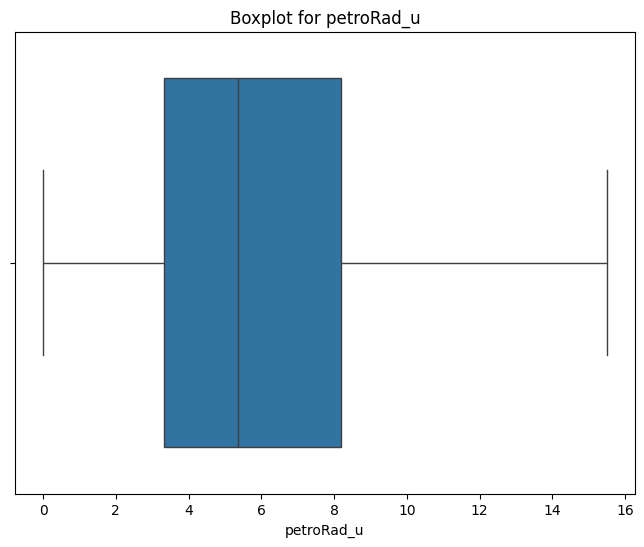

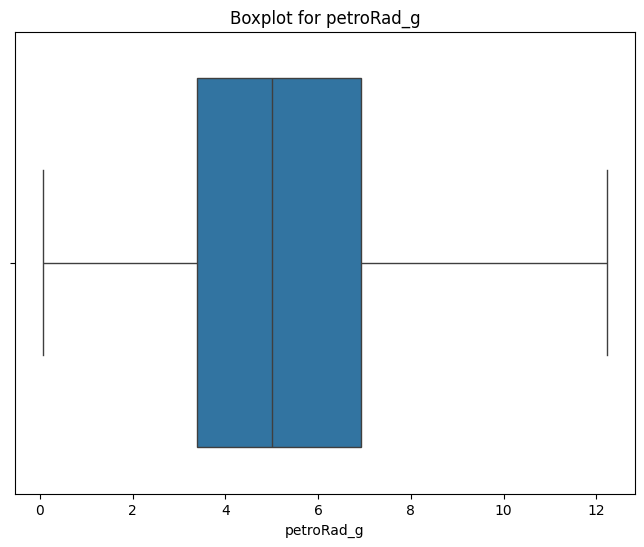

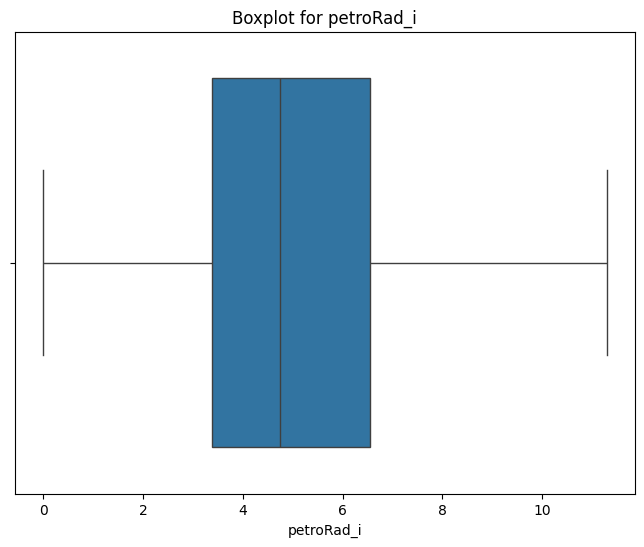

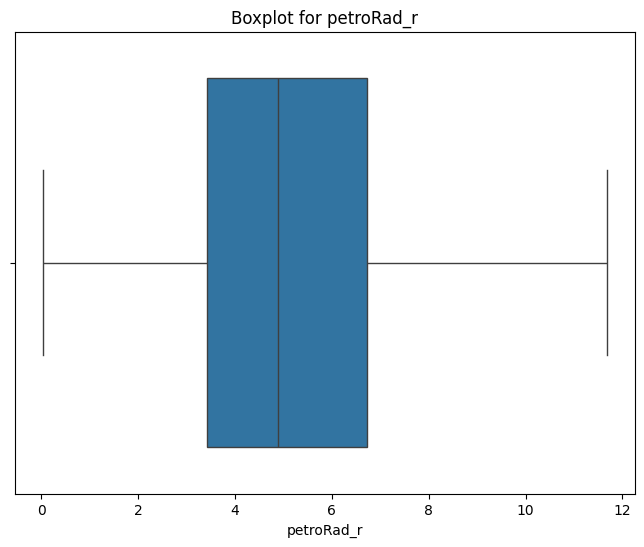

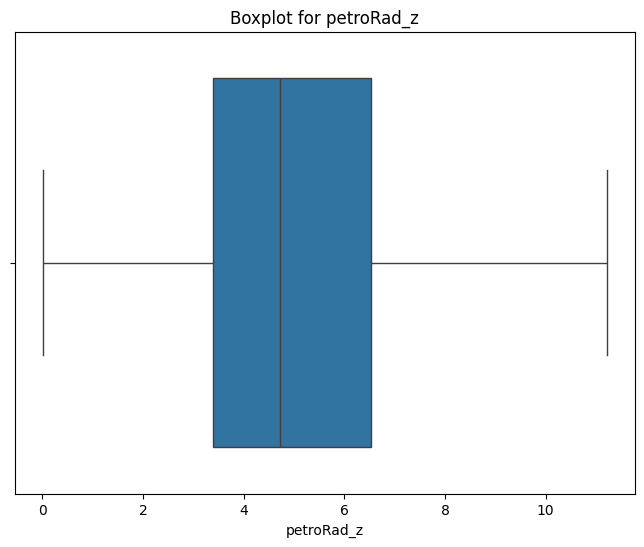

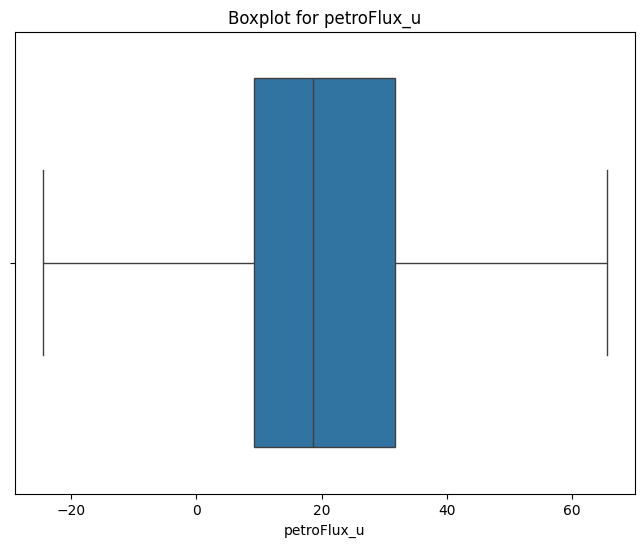

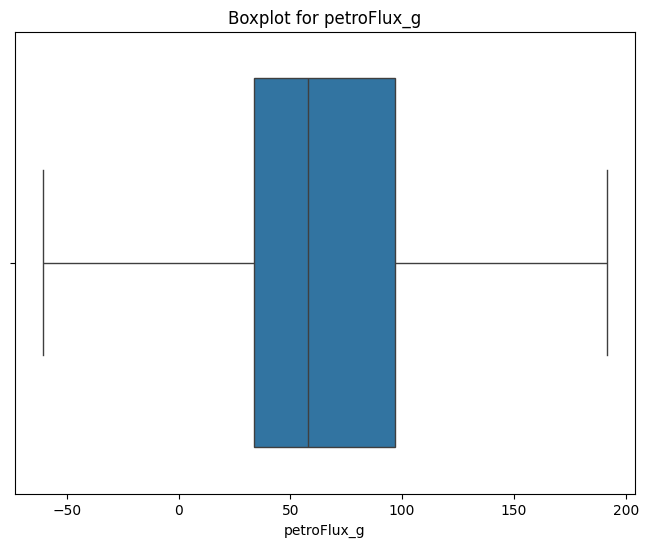

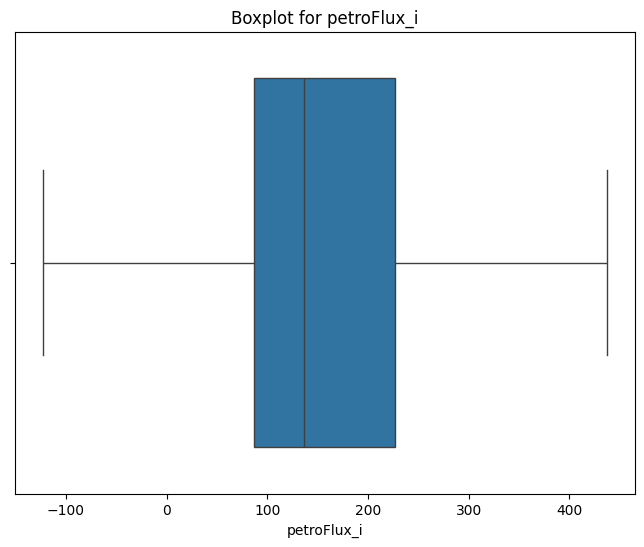

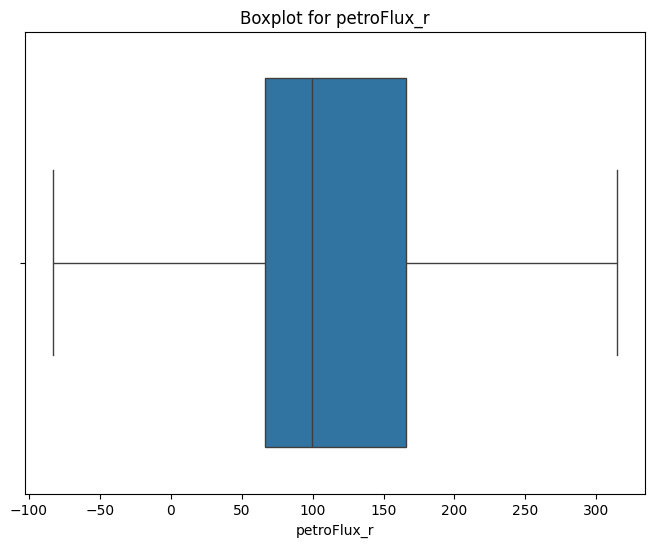

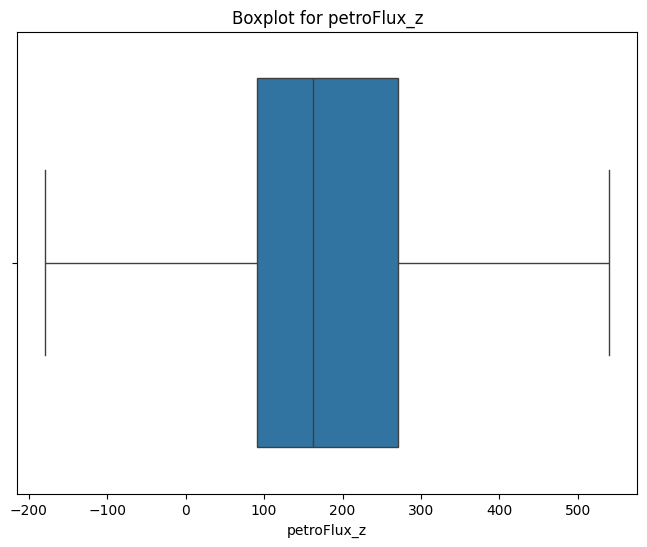

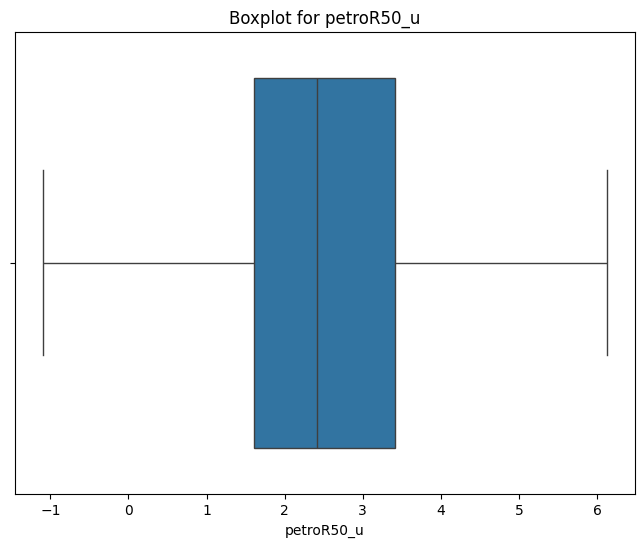

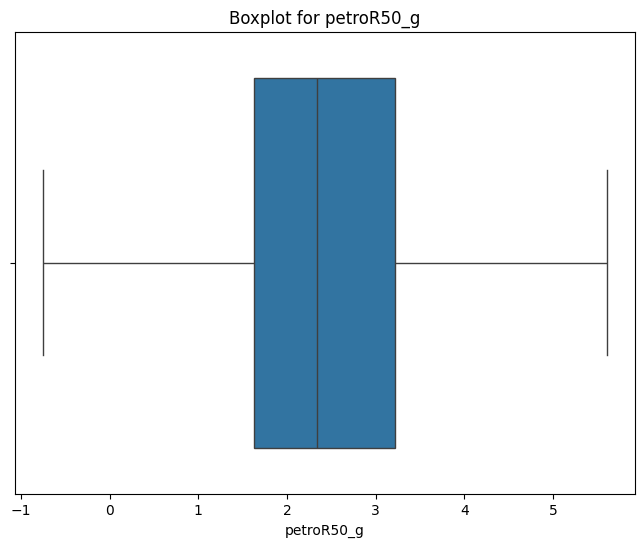

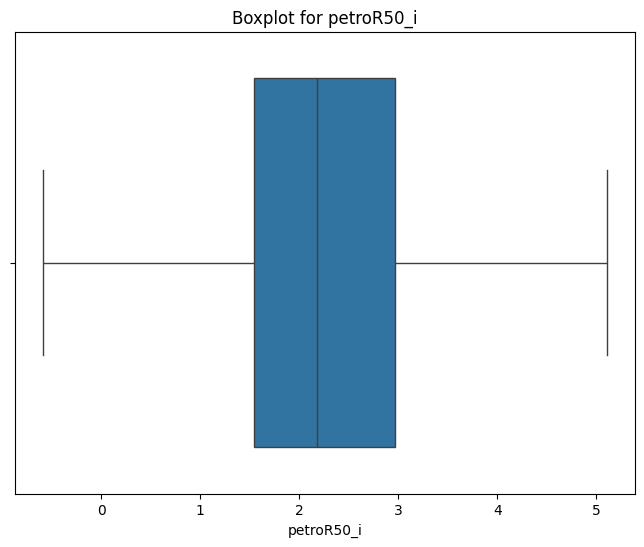

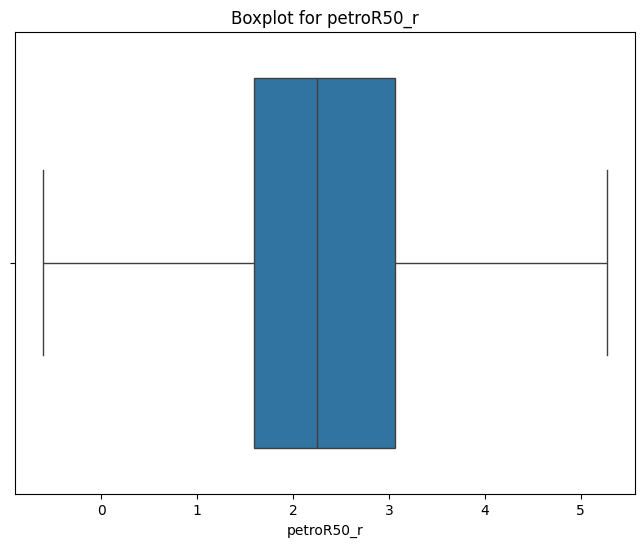

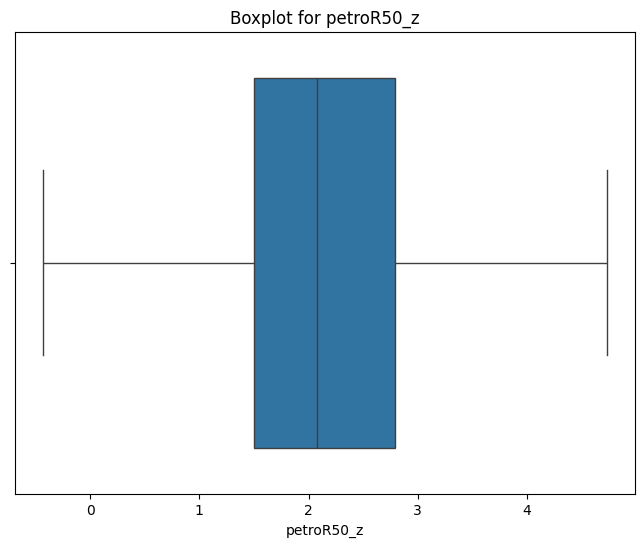

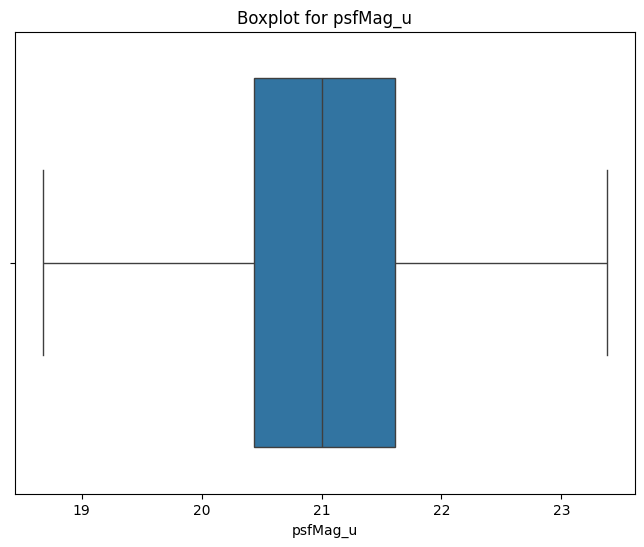

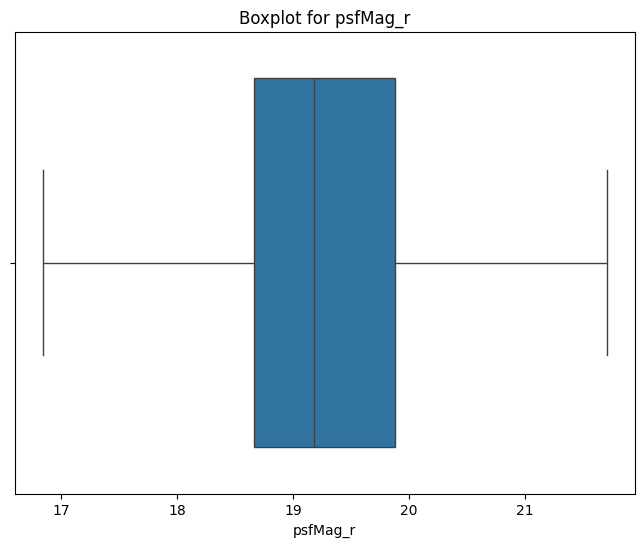

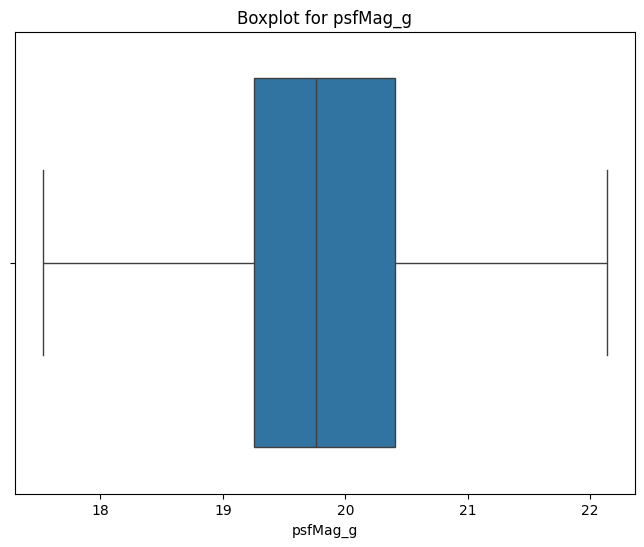

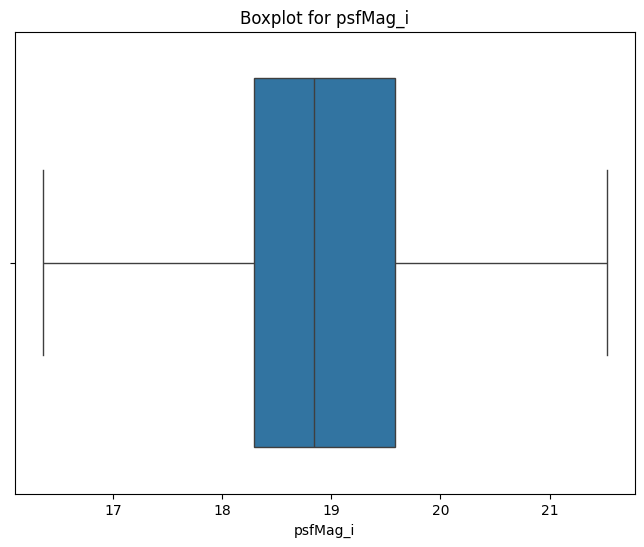

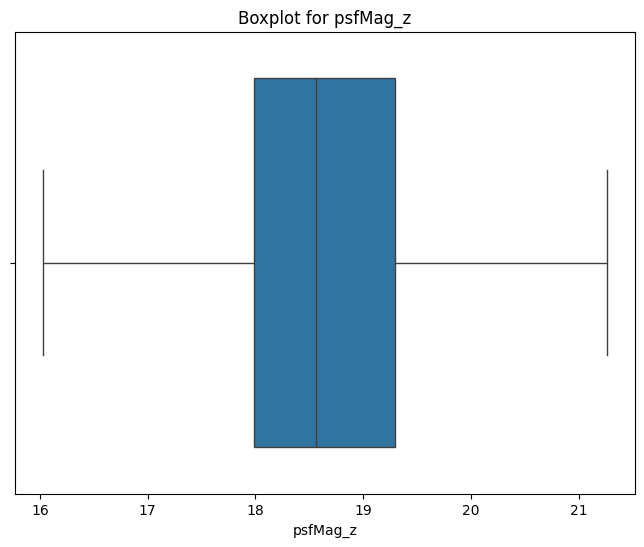

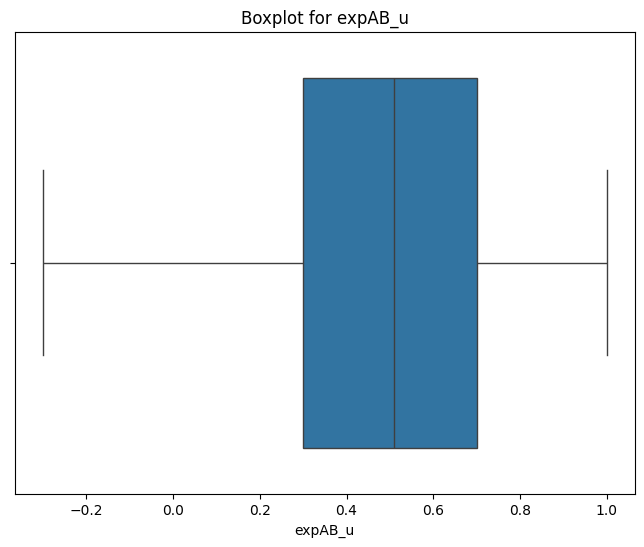

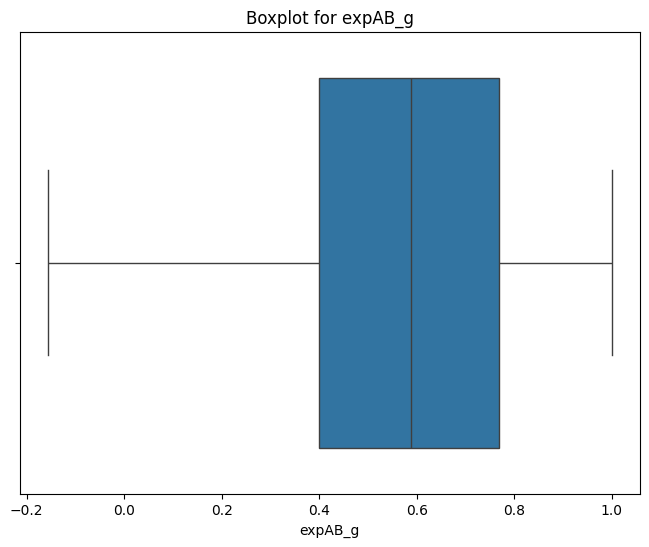

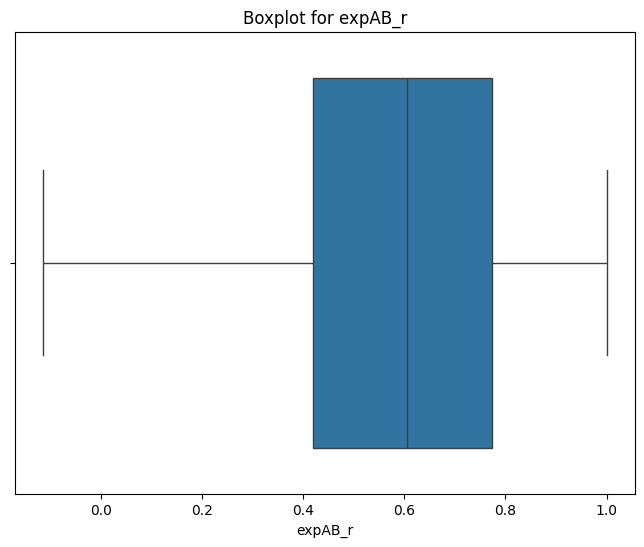

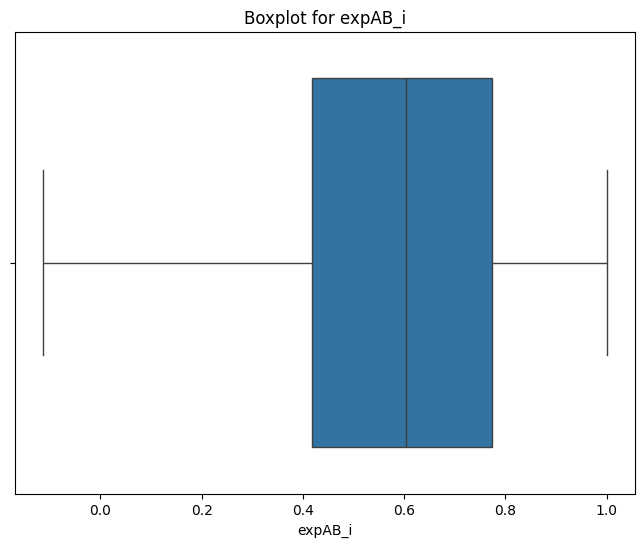

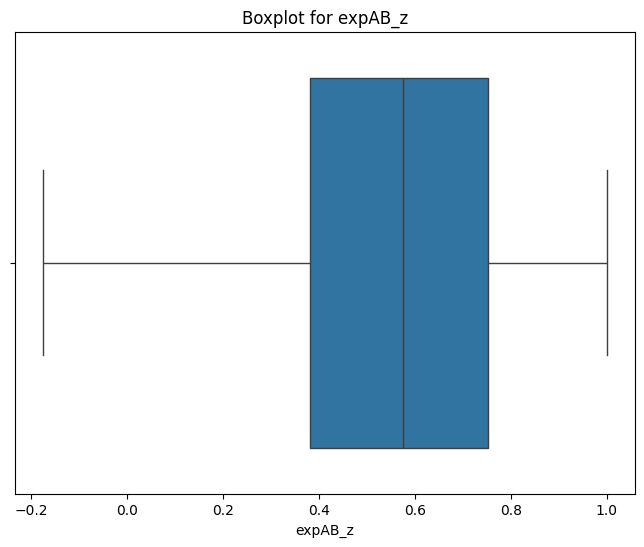

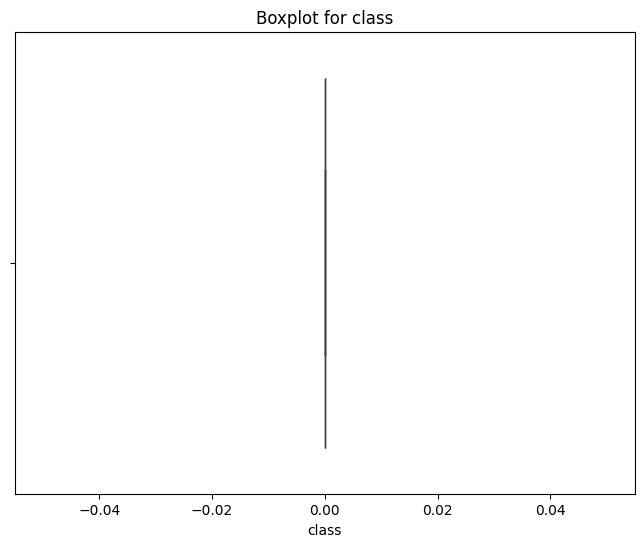

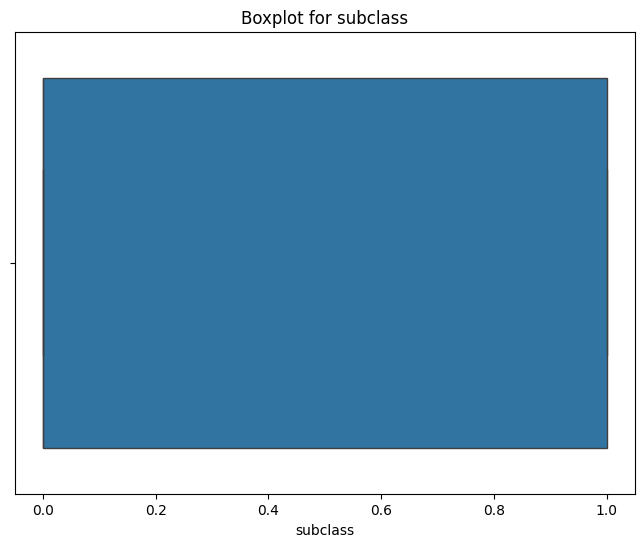

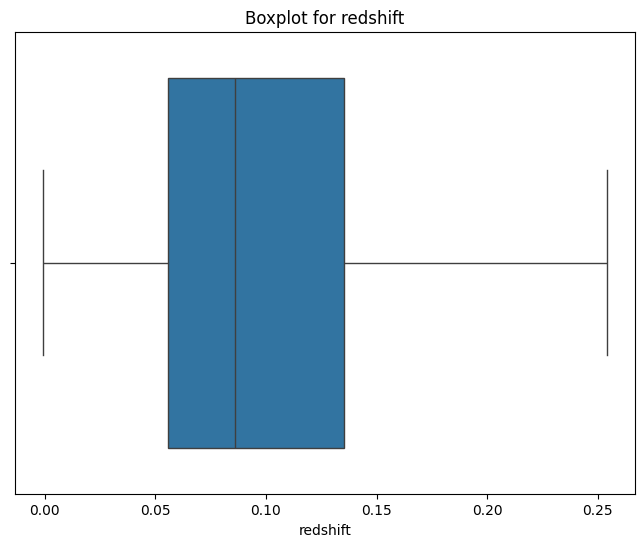

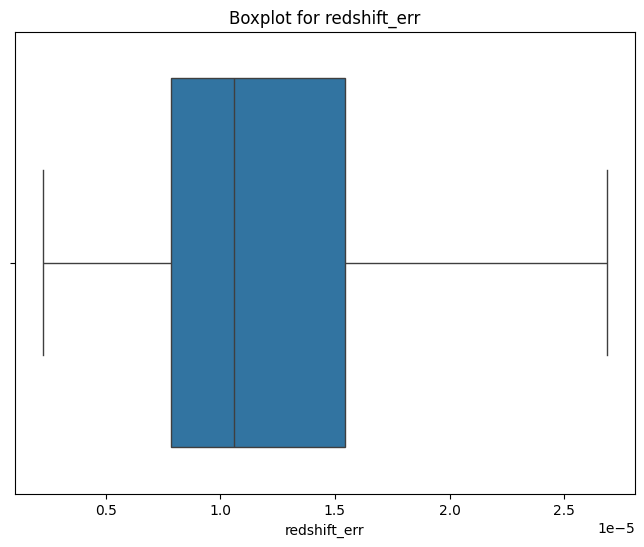

In [ ]:
# Iterate over each column and plot boxplot
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

BIVARIATE ANALYSIS

<Axes: xlabel='subclass', ylabel='i'>

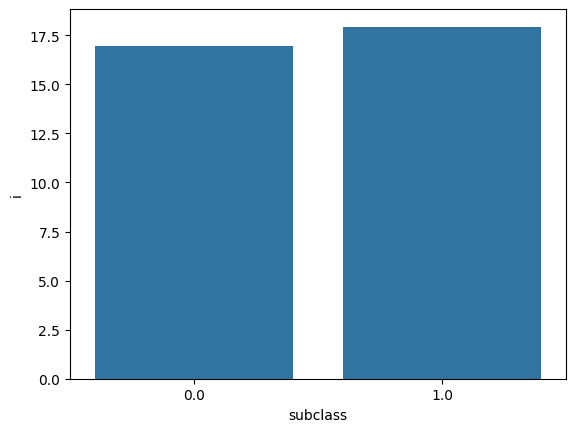

In [ ]:
sns.barplot(x='subclass',y='i',data=df)

<Axes: xlabel='subclass', ylabel='z'>

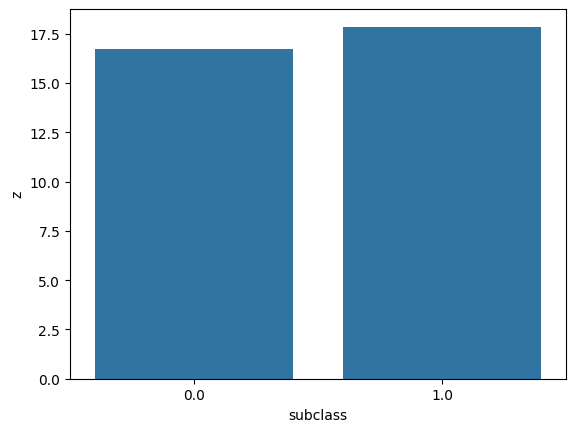

In [ ]:
sns.barplot(x='subclass',y='z',data=df)

MULTIVARIATE ANALYSIS

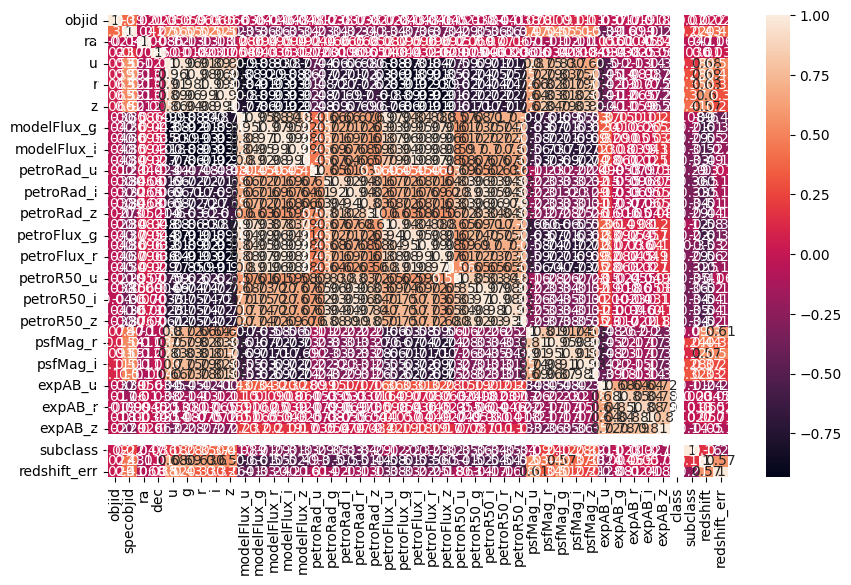

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

SELECTING BEST FEATURES USING SELECT K BEST

In [ ]:
x=df.drop(['subclass',],axis=1)
y=df['subclass']

In [ ]:
#i want to know top best columns in the data frame using selectkBest k=10
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Assuming x and y are your data and target variables
selector = SelectKBest(score_func=f_classif, k=10)  # select top 10 features
#selector = selectKBest(score_func=chi2,k=10)  # For classificaton takes with non negative features

#fit selector to the data
x_selected = selector.fit_transform(x,y) # Fixed: Use selector instead of features
# Get the names of the selected features
selected_features = x.columns[selector.get_support()] # Fixed: Use x instead of X

# print the selected features
print("selected features:",selected_features)

selected features: Index(['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


BALANCING VALUE COUNTS USING SMOTE

In [ ]:
# Assuming your target column is 'subclass' in your DataFrame 'df'
x = df.drop(['subclass','class'], axis=1)
y = df['subclass']

# Initialize SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE() # Initialize the SMOTE object

x_resampled, y_resampled = smote.fit_resample(x,y)

# check the new value counts
print(pd.Series(y_resampled).value_counts())

subclass
0.0    74993
1.0    74993
Name: count, dtype: int64


SPLITTING DATA INTO TRAIN AND TEST

In [ ]:
df1=df[['i','z','modelFlux_z','petroRad_g','petroRad_r','petroFlux_z','petroR50_u','petroR50_g','petroR50_i','petroR50_r','subclass']]

In [ ]:
from sklearn.model_selection import train_test_split
x=df1[['i','z','modelFlux_z','petroRad_g','petroRad_r','petroFlux_z','petroR50_u','petroR50_g','petroR50_i','petroR50_r']]
y=df1["subclass"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

SCALING THE FEATURE VARIABLES USING STANDARDSCALER METHOD

In [ ]:
from sklearn.preprocessing import StandardScaler
# create a scalar object
sc=StandardScaler()

# Transform your data
scaled_data = sc.fit_transform(x_train)

TRAINING THE MODEL IN MULTIPLE ALGORITHMS

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() # Use the correct class name with capitalization

# Train the classifier on the training data
clf.fit(x_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the classifier
from sklearn.metrics import classification_report # Don't forget to import this module
report = classification_report(y_test, y_pred)
print("classification Repoprt:\n",report)

classification Repoprt:
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.85     14845
         1.0       0.56      0.55      0.56      5155

    accuracy                           0.77     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.77      0.77      0.77     20000



In [ ]:
from sklearn.metrics import accuracy_score # Import the accuracy_score function
print(accuracy_score(y_pred,y_test))

0.77375


In [ ]:
print(accuracy_score(y_pred,y_test))

0.77375


LOGISTIC REGRESSION


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, confusion_matrix, f1_score

lg = LogisticRegression()
log=lg.fit(x_train,y_train)
print("confusion matrix: \n",confusion_matrix(y_test,y_pred))
print("............................................")
print("classification report:\n",classification_report(y_test,y_pred))
print("............................................")
print("accuracy score:\n",accuracy_score(y_test,y_pred))

confusion matrix: 
 [[12644  2201]
 [ 2324  2831]]
............................................
classification report:
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.85     14845
         1.0       0.56      0.55      0.56      5155

    accuracy                           0.77     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.77      0.77      0.77     20000

............................................
accuracy score:
 0.77375


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(accuracy_score(y_pred,y_test))

0.77375


RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier

# Train the Random Forest classifier
RF = RandomForestClassifier()

In [ ]:
RF.fit(x_train,y_train)
RFtrain=RF.predict(x_train)
RFtest=RF.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report # Import necessary functions


In [ ]:
# print classification report , confusion matrix
print(confusion_matrix(RFtrain,y_train))
print(confusion_matrix(RFtest,y_test))
print(classification_report(RFtrain,y_train)) # Fix the typo here
print(classification_report(RFtest,y_test)) # Fix the typo here

[[60148    93]
 [    0 19759]]
[[13869  2261]
 [  976  2894]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     60241
         1.0       1.00      1.00      1.00     19759

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.90     16130
         1.0       0.56      0.75      0.64      3870

    accuracy                           0.84     20000
   macro avg       0.75      0.80      0.77     20000
weighted avg       0.86      0.84      0.85     20000



In [ ]:
print(accuracy_score(RFtrain,y_train))
print(accuracy_score(RFtest,y_test))

0.9988375
0.83815


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Import the accuracy_score function

print(accuracy_score(RFtrain,y_train))
print(accuracy_score(RFtest,y_test))

0.9988375
0.83815


In [ ]:
RF.fit(x_train,y_train) # Train the model on your training data

RandomForestClassifier()

TEST THE MODEL

In [ ]:
RF.predict([[16.946170,16.708910,207.218700,4.180779,4.060687,194.731000,2.141953,2.149080,2.056686,2.055798]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [ ]:
RF.predict([[17.675285,17.53775,104.25655,3.397512,3.3975512,3.424717,90.717547,1.632243,1.548225,1.596137]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

SAVE THE MODEL

In [ ]:
import pickle

In [ ]:
pickle.dump(RF,open("RF.pkl","wb"))